# 効果測定（回帰：auto_mgp.csv）
## １．CSVファイルの読み込みと表示。

In [181]:
# pandasをインポートし、別名 pd とする
import pandas as pd
# matplotlib日本語化のためのライブラリのインストール
!pip install japanize-matplotlib
import japanize_matplotlib
%matplotlib inline
from sklearn.linear_model import LinearRegression
# train_test_splitメソッドのインポート
from sklearn.model_selection import train_test_split

# CSV読み込み
DATAFILE_PATH = 'datafiles'
FILE_NAME = 'auto_mgp.csv'
df = pd.read_csv(f'{DATAFILE_PATH}/{FILE_NAME}', encoding='cp932', index_col=0)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [182]:
# 先頭5行表示
df.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## ２．カテゴリ特徴量列のダミー変数化

In [183]:
#質的データの列（カテゴリ列）
# colum = df.columns
Q_COL_NAMES = ['Origin']
quality = df[Q_COL_NAMES]

#列にデータが何種類あるか(origin == 1)はアメ車、(origin == 2)は欧州車、(origin == 3)は日本車
for name in Q_COL_NAMES:
  print(df[name].value_counts())

1    249
3     79
2     70
Name: Origin, dtype: int64


In [184]:
# 質的データをダミー化
q = pd.get_dummies(df[Q_COL_NAMES[0]], drop_first=False)
df2 = pd.concat([df, q], axis=1)
df2 = df2.drop(Q_COL_NAMES[0], axis=1)
df2.head(5)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


## ３．テストデータの分離

In [185]:
# 訓練データ&検証データとテストデータに分割
train_val, test = train_test_split(df2, test_size = 0.2, random_state = 0)

## ４．前処理
### ４－１．欠損値処理

In [186]:
#欠損値数
train_val.isnull().sum()


MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
1               0
2               0
3               0
dtype: int64

In [187]:
# データの要約
train_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 64 to 172
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           318 non-null    float64
 1   Cylinders     318 non-null    int64  
 2   Displacement  318 non-null    float64
 3   Horsepower    313 non-null    float64
 4   Weight        318 non-null    int64  
 5   Acceleration  318 non-null    float64
 6   Model Year    318 non-null    int64  
 7   1             318 non-null    uint8  
 8   2             318 non-null    uint8  
 9   3             318 non-null    uint8  
dtypes: float64(4), int64(3), uint8(3)
memory usage: 20.8 KB


In [188]:
print('平均値(Horsepower)：', train_val['Horsepower'].mean())
print('中央値(Horsepower)：', train_val['Horsepower'].median())
print('最頻値(Horsepower)：', train_val['Horsepower'].mode())

平均値(Horsepower)： 103.70287539936102
中央値(Horsepower)： 93.0
最頻値(Horsepower)： 0    150.0
dtype: float64


In [189]:
#欠損値を平均値で補填
#train_val2 = train_val.fillna(train_val['Horsepower'].mean())
#欠損値のある行を除去
train_val2 = train_val.dropna()
#補完後の欠損値数の確認
train_val2.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
1               0
2               0
3               0
dtype: int64

## ４－２．以下を各手法を必要に応じて実装
### ４－２－１．外れ値処理

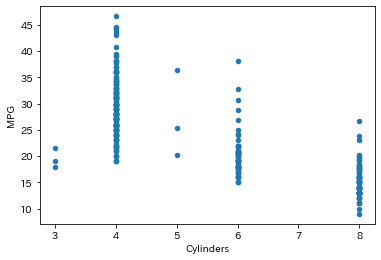

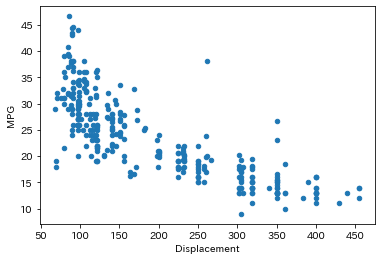

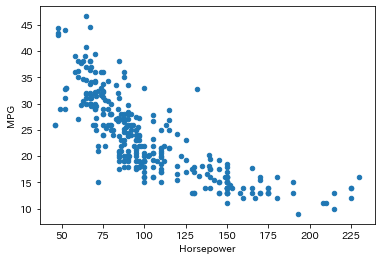

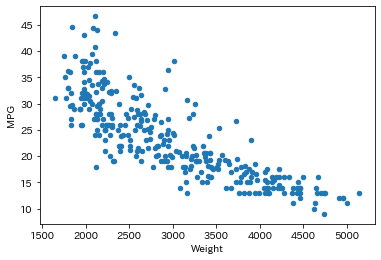

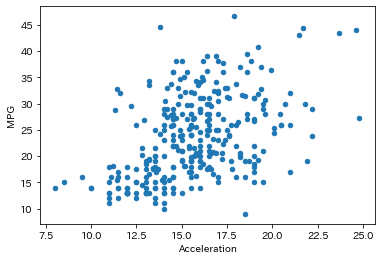

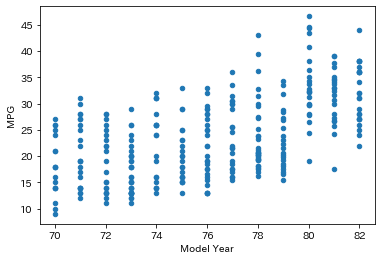

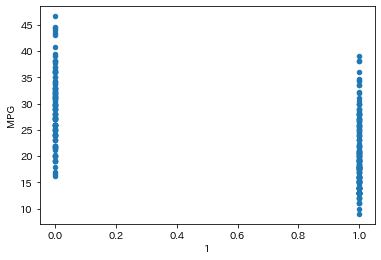

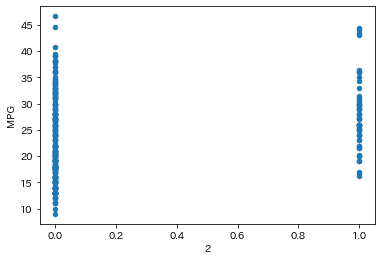

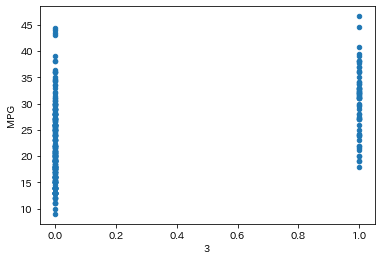

In [190]:
#全列との散布図を表示、規則性のある列を特定
cols = train_val2.columns[1:]
for name in cols:
  train_val2.plot(kind = 'scatter', x = name, y = 'MPG')

In [191]:
#MPGと他との相関関係を絶対値・降順で表示
train_mpg = train_val2.corr()['MPG'][1:]

train_mpg_abs = train_mpg.map(abs)
train_mpg_abs.sort_values(ascending=False)

Weight          0.824929
Displacement    0.799734
Horsepower      0.789558
Cylinders       0.767948
Model Year      0.576956
1               0.573785
Acceleration    0.468242
3               0.459412
2               0.242217
Name: MPG, dtype: float64

### ４－２－２．特徴量の絞り込み

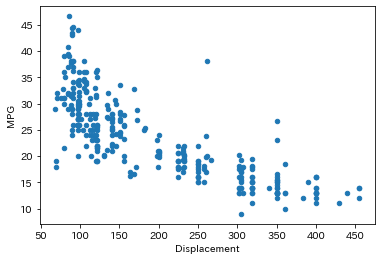

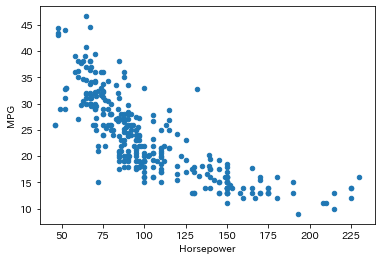

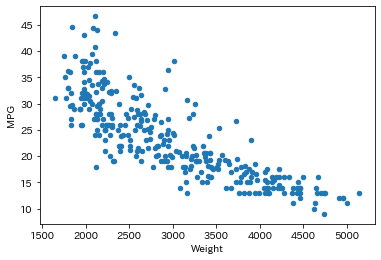

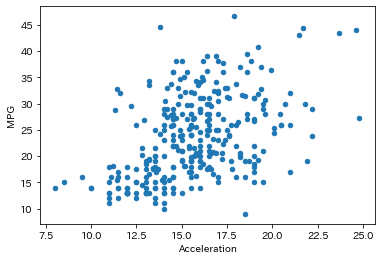

In [192]:
#特徴量として使えそうな列をピックアップ
F_VAL_COLS = (
  'Displacement'
  ,'Horsepower'
  ,'Weight'
  ,'Acceleration'
)
for name in F_VAL_COLS:
  train_val2.plot(kind = 'scatter',x = name,y = 'MPG')

In [193]:

import copy
train_val3 = copy.deepcopy(train_val2)

#外れ値を削除
out_idx_list = list(range(1))
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] > 30) & (train_val3['Displacement'] > 250)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] >= 20) & (train_val3['Displacement'] > 330)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 20) & (train_val3['Displacement'] < 75)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 25) & (train_val3['Displacement'] < 100)].index, axis=0)

train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] > 30) & (train_val3['Horsepower'] > 125)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 18) & (train_val3['Horsepower'] < 75)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 30) & (train_val3['Horsepower'] < 50)].index, axis=0)

train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] > 40) & (train_val3['Acceleration'] < 19)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 30) & (train_val3['Acceleration'] > 23)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 10) & (train_val3['Acceleration'] > 17)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 20) & (train_val3['Acceleration'] > 20)].index, axis=0)
train_val3 = train_val3.drop(train_val3[(train_val3['MPG'] < 25) & (train_val3['Acceleration'] > 22)].index, axis=0)

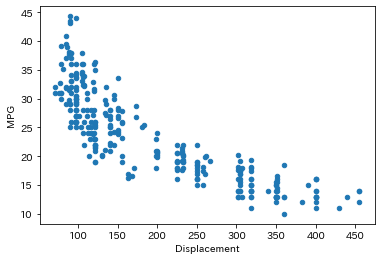

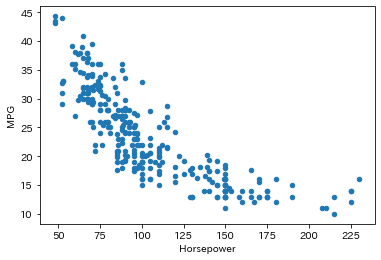

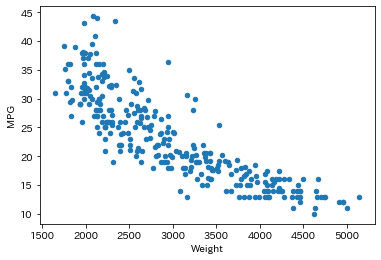

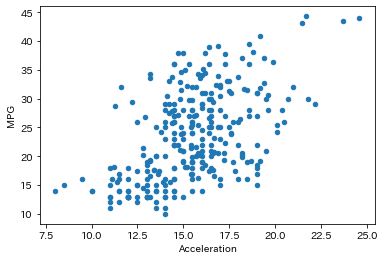

In [194]:
#確認のため散布図を表示
for name in F_VAL_COLS:
  train_val3.plot(kind = 'scatter',x = name,y = 'MPG')

In [195]:
#MPGとの相関係数→絶対値→DESCにソート
train_val3.corr()['MPG'].map(abs).sort_values(ascending=False)

# BEFORE
# Weight          0.823764
# Displacement    0.798952
# Horsepower      0.786905
# Cylinders       0.766144
# 1               0.574236
# Model Year      0.573256
# Acceleration    0.462807
# 3               0.455004
# 2               0.249051
# Name: MPG, dtype: float64



MPG             1.000000
Weight          0.853362
Displacement    0.844373
Cylinders       0.817746
Horsepower      0.815586
1               0.596361
Model Year      0.573790
Acceleration    0.541627
3               0.473170
2               0.262972
Name: MPG, dtype: float64

### ■正解データと特徴量を抽出

In [196]:
# 正解データを取り出す
t = train_val3['MPG']

# 特徴量を取り出す
x = train_val3[[*F_VAL_COLS]]

# 正解量、特徴量の先頭の５行を表示
pd.concat([t.head(5), x.head(5)], axis=1)


,MPG,Displacement,Horsepower,Weight,Acceleration
64,15.0,318.0,150.0,4135,13.5
55,27.0,97.0,60.0,1834,19.0
317,34.3,97.0,78.0,2188,15.8
358,31.6,120.0,74.0,2635,18.3
331,33.8,97.0,67.0,2145,18.0


### ■訓練データと検証データに分割

In [197]:
x_train,x_val,y_train,y_val = train_test_split(x,t,test_size = 0.2,random_state = 0)

### ４－２－３．標準化

In [198]:
from sklearn.preprocessing import StandardScaler

#標準化を行い、決定係数を算出
sc_model_x = StandardScaler()
sc_x = sc_model_x.fit_transform(x_train)

sc_model_y = StandardScaler()
df_y = pd.DataFrame({"MPG": y_train})
sc_y = sc_model_y.fit_transform(df_y[["MPG"]])

sc_value_x = sc_model_x.transform(x_val)
df_y_val = pd.DataFrame({"MPG": y_val })
sc_value_y = sc_model_y.transform(df_y_val[["MPG"]])


### ■学習・決定係数の算出(重回帰)

In [199]:
lr_model = LinearRegression()
#標準化あり
lr_model.fit(sc_x, sc_y).score(sc_value_x, sc_value_y)

0.7481476647382679

In [200]:
#標準化なし
lr_model.fit(x_train, y_train).score(x_val, y_val)

0.748147664738268

### ４－２－４．多項式特徴量、交互作用特徴量を必要に応じて追加

### ■学習・決定係数の算出(交互作用特徴量の追加)

In [201]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2, include_bias = False)
pf_x = pf.fit_transform(sc_x) #2乗列と交互作用特徴量の追加
pf_x.shape #行数と列数

(234, 14)

In [202]:
pf.get_feature_names()

['x0',
 'x1',
 'x2',
 'x3',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x2^2',
 'x2 x3',
 'x3^2']

### ４－２－５．特徴量と正解の分割

In [203]:
pf_x_train,pf_x_val,pf_y_train,pf_y_val = train_test_split(pf_x, sc_y, test_size = 0.2, random_state = 0)

## ５．学習モデルの選択
### ■学習・決定係数算出（交互作用特徴量追加のみ）

In [204]:
lr_model2 = LinearRegression()
lr_model2.fit(pf_x_train, pf_y_train).score(pf_x_val, pf_y_val)

0.8223188648058498

In [205]:
#標準化なし
lr_model2.fit(x_train, y_train).score(x_val, y_val)

0.748147664738268

### ■学習・決定係数の算出(リッジ回帰)

In [206]:
from sklearn.linear_model import Ridge
# モデルの作成
ridge_model = Ridge(alpha = 10)
ridge_model.fit(sc_x, sc_y).score(sc_value_x, sc_value_y)


0.7574784287062495

### ■学習・決定係数の算出(ラッソ回帰)

In [207]:
from sklearn.linear_model import Lasso

l_model = Lasso(alpha = 0.2)
l_model.fit(x_train, y_train).score(x_val, y_val)

0.747470934229449

### ■学習・決定係数の算出(回帰木)

In [208]:
from sklearn.tree import DecisionTreeRegressor

dtr_x_train,dtr_x_val,dtr_y_train,dtr_y_val = train_test_split(sc_x, sc_y,test_size = 0.2,random_state = 0)

dtr_model = DecisionTreeRegressor(max_depth = 10, random_state = 0)
dtr_model.fit(dtr_x_train, dtr_y_train).score(dtr_x_val, dtr_y_val)

0.726088219357049

## ６．選択された学習モデルで学習

In [209]:
lr_model2.fit(pf_x_train, pf_y_train)

LinearRegression()

## ７．正解率または決定係数の表示

In [210]:
lr_model2.score(pf_x_val, pf_y_val)

0.8223188648058498

## ８．学習後のモデルを保存

In [211]:
import pickle
with open('auto_mgp_lr.pkl','wb') as f:
  pickle.dump(lr_model,f)
with open('auto_mgp_lr2.pkl','wb') as f:
  pickle.dump(lr_model2,f)
with open('auto_mgp_ridge.pki','wb') as f:
  pickle.dump(ridge_model,f)
with open('auto_mgp_lasso.pki','wb') as f:
  pickle.dump(l_model,f)
with open('auto_mgp_dtr.pki','wb') as f:
  pickle.dump(dtr_model,f)
